<a href="https://colab.research.google.com/github/zhafarulmaahiy/pembelajaran-machine-Muhammad_zhafarul_Maahiy-2211533009/blob/main/logis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [12]:
data = pd.read_csv("/content/drive/My Drive/MachineLearning/heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
column_list = data.columns
for i in column_list:
    print("Values of",i,"column\n",data[i].unique())
    print("--------------\n")

Values of age column
 [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
--------------

Values of sex column
 [1 0]
--------------

Values of cp column
 [0 1 2 3]
--------------

Values of trestbps column
 [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
--------------

Values of chol column
 [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 

In [15]:
# fiture enginering
dummy_list = ["sex","cp","restecg","exang","slope","thal"]
data = pd.get_dummies(data,columns=dummy_list)
data.head()

,age,trestbps,chol,fbs,thalach,oldpeak,ca,target,sex_0,sex_1,...,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,52,125,212,0,168,1.0,2,0,False,True,...,False,True,False,False,False,True,False,False,False,True
1,53,140,203,1,155,3.1,0,0,False,True,...,False,False,True,True,False,False,False,False,False,True
2,70,145,174,0,125,2.6,0,0,False,True,...,False,False,True,True,False,False,False,False,False,True
3,61,148,203,0,161,0.0,1,0,False,True,...,False,True,False,False,False,True,False,False,False,True
4,62,138,294,1,106,1.9,3,0,True,False,...,False,True,False,False,True,False,False,False,True,False


In [16]:
# ML model
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y = data.target.values
x_data = data.drop(["target"],axis=1)

In [18]:
# normalization
# big values can be dominated low values so we use normalization method
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))

In [19]:
# train test split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 42)
print("x_train",len(x_train))
print("x_test",len(x_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

x_train 717
x_test 308
y_train 717
y_test 308


In [20]:
random_state = 42
classifier = [KNeighborsClassifier(),
              SVC(random_state = random_state,probability=True),
              DecisionTreeClassifier(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             ]

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

svm_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}


rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}


classifier_param = [knn_param_grid,
                   svm_param_grid,
                    dt_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [21]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_ * 100)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 40 candidates, totalling 400 fits
97.2085289514867
Fitting 10 folds for each of 28 candidates, totalling 280 fits
84.6498435054773
Fitting 10 folds for each of 250 candidates, totalling 2500 fits
90.5027386541471
Fitting 10 folds for each of 54 candidates, totalling 540 fits
98.462441314554
Fitting 10 folds for each of 14 candidates, totalling 140 fits
77.94600938967136


In [23]:
# We must detect the best k value of knn model so we will determine best_estimators list
best_estimators

[KNeighborsClassifier(metric='manhattan', n_neighbors=15, weights='distance'),
 SVC(C=1000, gamma=1, probability=True, random_state=42),
 DecisionTreeClassifier(max_depth=11, min_samples_split=10, random_state=42),
 RandomForestClassifier(bootstrap=False, max_features=1, n_estimators=300,
                        random_state=42),
 LogisticRegression(C=1000.0, random_state=42)]

In [24]:
# We must find predicted values of each models. After that, we will compare with real values.
knn9 = KNeighborsClassifier(n_neighbors = 9)
knn9.fit(x_train, y_train)
y_head_knn = knn9.predict(x_test)

svm = SVC(random_state = 1)
svm.fit(x_train,y_train)
y_head_svm = svm.predict(x_test)

rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(x_train,y_train)
y_head_rf = rf.predict(x_test)

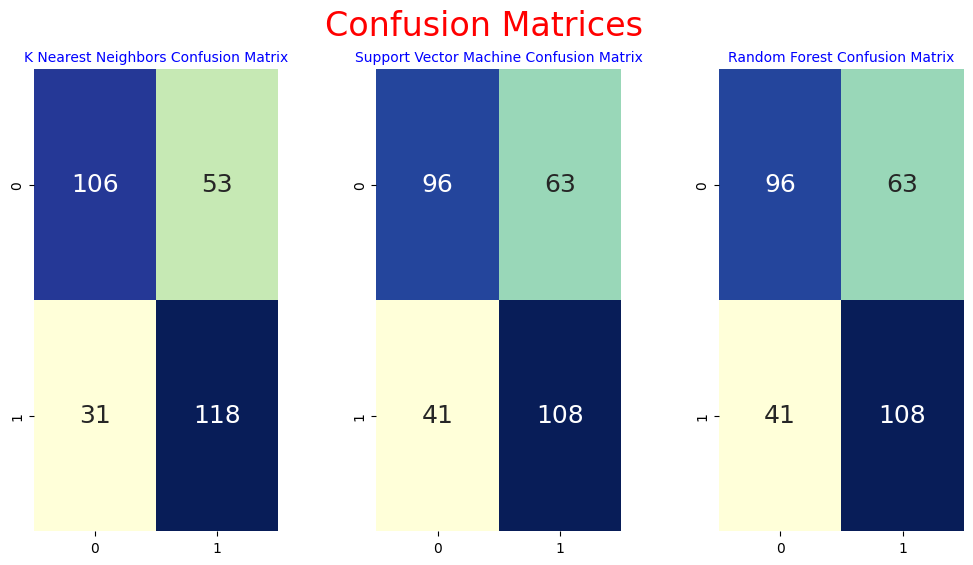

In [25]:
# We find confusion matrix of models below.
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_svm = confusion_matrix(y_test,y_head_svm)
cm_rf = confusion_matrix(y_test,y_head_rf)

# Let's visualize them
plt.figure(figsize=(12,6))
plt.suptitle("Confusion Matrices",fontsize=24, color="red")
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(1,3,1)
plt.title("K Nearest Neighbors Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_knn,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,2)
plt.title("Support Vector Machine Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(1,3,3)
plt.title("Random Forest Confusion Matrix",fontsize=10,color="blue")
sns.heatmap(cm_svm,annot=True, cmap="YlGnBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.show()

In [26]:
# enessambel modelling
votingC = VotingClassifier(estimators = [("knn",best_estimators[0]),
                                        ("svm",best_estimators[1]),
                                        ("rf",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print("Accuracy of Ensemble: {:.2f}".format(accuracy_score(votingC.predict(x_test),y_test)*100))

Accuracy of Ensemble: 100.00


In [27]:
# simple logistic regression

best_accuracies_each_classes = {}
lr = LogisticRegression()
lr.fit(x_train, y_train)
accuracy_lr_train = round(lr.score(x_train, y_train)*100,2)
accuracy_lr_test = round(lr.score(x_test,y_test)*100,2)
best_accuracies_each_classes["Logistic Regression"] = lr.score(x_test,y_test)*100
print("Training Accuracy: {}%".format(accuracy_lr_train))
print("Testing Accuracy: {}%".format(accuracy_lr_test))

Training Accuracy: 64.99%
Testing Accuracy: 59.42%
